# Sales Forecasting

## Introduction

### Task

You are expected to collaborate with your group members to
understand the business problem and lay out the data preprocessing plan for formative feedback, before you complete an
individual report (length: 2500 words) for assessment. 
Your work should cover (but not be limited to) the following.
- Review the data and describe them in terms of available
variables, quality, and relevance to the sales forecasting,
- Integrate relevant data sets together as appropriate,
- Pre-process the data as appropriate for further analytics, for
example, encode categorical variables, create new variables,
identify and deal with missing values or records as appropriate.
- Identify the key variables affecting sales, for example, check
whether competition and promotions have an impact on sales,
and how public holidays cause sales fluctuations.
- Build a forecasting model (which can be a simple regression
model or any advanced machine learning model you are familiar
with). The main focus here is to check the validity of the variables
you’ve pre-processed and identified above, rather than to build a
sophisticated forecasting model.
- Interpret key results, assumptions and limitations of your data
pre-processing and analysis.

### Setting Up

As [before](https://github.com/peterprescott/ward-lifetimes/blob/master/ward_lifetimes.ipynb), I recommend working in this notebook in a Docker container.

```
docker container run -it -p 8888:8888 darribas/gds_py:4.0 bash
git clone https://github.com/peterprescott/sales-data
cd ward-lifetimes
jupyter lab
```

This may take a little while to download. When it is ready, you will then be instructed to copy into your browser a URL that looks like this: http://127.0.0.1:8888/?token=39dd92f7720d42d5f9abab59485ca208a4dafb877852f1be (though your security token at the end will be different). Do that, click ward_lifetimes.ipynb on the left sidebar, and you should find yourself looking at a live version of this notebook.

## Review Data

In [2]:
store

Stored variables and their in-db values:


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# read in stores data
store = pd.read_csv('DA1920_store.csv')
print(store.shape)
store.head().transpose()

(1115, 12)


,0,1,2,3,4
Store,1,2,3,4,5
StoreType,c,a,a,c,a
Assortment,a,a,a,c,a
CompetitionDistance,1270,570,14130,620,29910
CompetitionOpenSinceMonth,9,11,12,9,4
CompetitionOpenSinceYear,2008,2007,2006,2009,2015
Promo2,0,1,1,0,0
Promo2SinceWeek,NaN,13,14,NaN,NaN
Promo2SinceYear,NaN,2010,2011,NaN,NaN
PromoInterval,NaN,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",NaN,NaN


In [5]:
store.loc[store["Unnamed: 11"].isnull()==False]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Unnamed: 10,Unnamed: 11
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,NaN,


In [6]:
store.loc[store["Unnamed: 10"].isnull()==False]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Unnamed: 10,Unnamed: 11


In [7]:
store.drop(columns=["Unnamed: 11", "Unnamed: 10"], inplace=True)

In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
store.Store.describe() # as it should be

count    1115.00000
mean      558.00000
std       322.01708
min         1.00000
25%       279.50000
50%       558.00000
75%       836.50000
max      1115.00000
Name: Store, dtype: float64

In [10]:
print(store.StoreType.describe())
print(store.StoreType.value_counts()) # no null values

count     1115
unique       4
top          a
freq       602
Name: StoreType, dtype: object
a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64


In [11]:
print(store.Assortment.describe())
print(store.Assortment.value_counts()) # no null values

count     1115
unique       3
top          a
freq       593
Name: Assortment, dtype: object
a    593
c    513
b      9
Name: Assortment, dtype: int64


In [12]:
print(store.CompetitionDistance.describe())
print(store.CompetitionDistance.isnull().value_counts()) # null for 3

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64
False    1112
True        3
Name: CompetitionDistance, dtype: int64


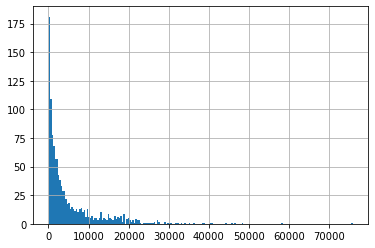

In [13]:
store.CompetitionDistance.hist(bins=200)

In [14]:
print(store.CompetitionOpenSinceMonth.describe())
print(store.CompetitionOpenSinceMonth.isnull().value_counts()) # null for 354

count    761.000000
mean       7.224704
std        3.212348
min        1.000000
25%        4.000000
50%        8.000000
75%       10.000000
max       12.000000
Name: CompetitionOpenSinceMonth, dtype: float64
False    761
True     354
Name: CompetitionOpenSinceMonth, dtype: int64


In [15]:
print(store.CompetitionOpenSinceYear.describe())
print(store.CompetitionOpenSinceYear.isnull().value_counts()) # null for 354 ~ check these are same as above...

count     761.000000
mean     2008.668857
std         6.195983
min      1900.000000
25%      2006.000000
50%      2010.000000
75%      2013.000000
max      2015.000000
Name: CompetitionOpenSinceYear, dtype: float64
False    761
True     354
Name: CompetitionOpenSinceYear, dtype: int64


In [16]:
store.loc[(store.CompetitionOpenSinceYear >= 2013) & (store.CompetitionOpenSinceYear <= 2015)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
13,14,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1084,1085,c,a,4030.0,2.0,2015.0,0,NaN,NaN,NaN
1085,1086,a,a,180.0,11.0,2013.0,1,18.0,2011.0,"Feb,May,Aug,Nov"
1093,1094,d,a,2380.0,3.0,2013.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
1098,1099,a,c,200.0,4.0,2013.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct"


In [17]:
print(store.Promo2.isnull().value_counts()) # no null values

False    1115
Name: Promo2, dtype: int64


In [18]:
print(store.Promo2SinceWeek.isnull().value_counts()) # 544 null values

False    571
True     544
Name: Promo2SinceWeek, dtype: int64


In [19]:
print(store.Promo2SinceYear.isnull().value_counts()) # 544 null values

False    571
True     544
Name: Promo2SinceYear, dtype: int64


In [20]:
print(store.PromoInterval.isnull().value_counts()) # 544 null values

False    571
True     544
Name: PromoInterval, dtype: int64


In [21]:
# read in train data
train = pd.read_csv('DA1920_train.csv', parse_dates=['Date'])
train.shape
train.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [23]:
print(train.Store.unique)
print(train.Store.isnull().value_counts()) # no null values

<bound method Series.unique of 0             1
1             2
2             3
3             4
4             5
           ... 
1017204    1111
1017205    1112
1017206    1113
1017207    1114
1017208    1115
Name: Store, Length: 1017209, dtype: int64>
False    1017209
Name: Store, dtype: int64


In [24]:
print(train.DayOfWeek.isnull().value_counts()) # no null values
print(train.DayOfWeek.value_counts())

False    1017209
Name: DayOfWeek, dtype: int64
5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64


In [25]:
print(train.Date.isnull().value_counts()) # no null values
print(train.Date.describe()) # includes dates beyond the proper time frame (2013-Jan-01 to 2015-July-31)

False    1017209
Name: Date, dtype: int64
count                 1017209
unique                    942
top       2014-12-02 00:00:00
freq                     1115
first     2013-01-01 00:00:00
last      2015-12-07 00:00:00
Name: Date, dtype: object


In [26]:
train.Date.unique()[0] # this is the cut-off

numpy.datetime64('2015-07-31T00:00:00.000000000')

In [27]:
properDates = train.loc[train.Date<=train.Date.unique()[0]]

In [28]:
properDates.Date.describe()

count                  978184
unique                    907
top       2014-12-02 00:00:00
freq                     1115
first     2013-01-01 00:00:00
last      2015-07-31 00:00:00
Name: Date, dtype: object

In [29]:
properDates.Sales.isnull().value_counts() # no null values

False    978184
Name: Sales, dtype: int64

In [30]:
properDates.Customers.isnull().value_counts() # no null values

False    978184
Name: Customers, dtype: int64

In [31]:
properDates.Open.isnull().value_counts() # no null values

False    978184
Name: Open, dtype: int64

In [32]:
properDates.loc[(properDates.Sales > 0) & (properDates.Customers == 0)] # sense check

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [33]:
properDates.Promo.isnull().value_counts() # no null values

False    978184
Name: Promo, dtype: int64

In [34]:
properDates.StateHoliday.isnull().value_counts() # no null values

False    978184
Name: StateHoliday, dtype: int64

In [35]:
properDates.SchoolHoliday.isnull().value_counts() # no null values

False    978184
Name: SchoolHoliday, dtype: int64

In [36]:
# read in test data
test = pd.read_csv('DA1920_test.csv', parse_dates=['Date'])

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          41088 non-null  int64         
 1   DayOfWeek      41088 non-null  int64         
 2   Date           41088 non-null  datetime64[ns]
 3   Sales          0 non-null      float64       
 4   Customers      0 non-null      float64       
 5   Open           41077 non-null  float64       
 6   Promo          41088 non-null  int64         
 7   StateHoliday   41088 non-null  object        
 8   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 2.8+ MB


In [38]:
test.Date.describe()

count                   41088
unique                     48
top       2015-09-15 00:00:00
freq                      856
first     2015-01-08 00:00:00
last      2015-12-09 00:00:00
Name: Date, dtype: object

In [39]:
test.Date[0]

Timestamp('2015-09-17 00:00:00')

In [40]:
len(test.Date.unique())

48

In [41]:
test

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-01-08,NaN,NaN,1.0,0,0,0
41084,1112,6,2015-01-08,NaN,NaN,1.0,0,0,0
41085,1113,6,2015-01-08,NaN,NaN,1.0,0,0,0
41086,1114,6,2015-01-08,NaN,NaN,1.0,0,0,0


## Integrate Data Sets as Appropriate

In [42]:
# merge on store ID
combine = pd.merge(store, properDates, on='Store')

In [43]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978184 entries, 0 to 978183
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      978184 non-null  int64         
 1   StoreType                  978184 non-null  object        
 2   Assortment                 978184 non-null  object        
 3   CompetitionDistance        975647 non-null  float64       
 4   CompetitionOpenSinceMonth  667226 non-null  float64       
 5   CompetitionOpenSinceYear   667226 non-null  float64       
 6   Promo2                     978184 non-null  int64         
 7   Promo2SinceWeek            489193 non-null  float64       
 8   Promo2SinceYear            489193 non-null  float64       
 9   PromoInterval              489193 non-null  object        
 10  DayOfWeek                  978184 non-null  int64         
 11  Date                       978184 non-null  datetime

In [44]:
combine.dummyDay = 1 # assume that competition was open from the beginning of the month they opened

competitionOpenSinceDate = pd.DataFrame({'year': combine.CompetitionOpenSinceYear,
                                                'month': combine.CompetitionOpenSinceMonth,
                                                'day': combine.dummyDay})

combine['CompetitionOpenSinceDate'] = pd.to_datetime(competitionOpenSinceDate)

combine['Competition'] = np.where(combine['CompetitionOpenSinceDate'] < combine['Date'], 1, 0)
# note that this gives nan values a '1' -- ie. we assume that where the date is unknown,
# that competition has been open since before 2013.
nearby = 10000
combine['NearbyCompetition'] = np.where(((combine['Competition']==1)\
                                         & (combine['CompetitionDistance']<nearby)), 1, 0)

## Pre-Process Data for Further Analytics

In [45]:
# it seems easier to get a week number from a date than vice versa
combine['WeekNumber'] = combine['Date'].dt.week
combine['Month'] = combine['Date'].dt.month
combine['Year'] = combine['Date'].dt.year

In [46]:
combine.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Open,Promo,StateHoliday,SchoolHoliday,CompetitionOpenSinceDate,Competition,NearbyCompetition,WeekNumber,Month,Year
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,1,1,0,1,2008-09-01,1,1,31,7,2015
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,1,1,0,1,2008-09-01,1,1,31,7,2015
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,1,1,0,1,2008-09-01,1,1,31,7,2015
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,1,1,0,1,2008-09-01,1,1,31,7,2015
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,1,1,0,1,2008-09-01,1,1,31,7,2015


In [47]:
sales_stats = combine.groupby(['WeekNumber','Year','Store'])['Sales'].agg([sum])
sales_stats = sales_stats.rename(columns= {'sum': 'WeeklySales'})
sales_stats

WeeklySales
WeekNumber Year Store             
1          2013 1            25492
                2            20846
                3            32831
                4            58022
                5            19170
...                            ...
52         2014 1111         19800
                1112         40455
                1113         41229
                1114         93216
                1115         36168

[147465 rows x 1 columns]

In [48]:
sales_stats_m = combine.groupby(['Month','Year','Store'])['Sales'].agg([sum])
sales_stats_m = sales_stats_m.rename(columns= {'sum': 'MonthlySales'})
sales_stats_m

MonthlySales
Month Year Store              
1     2013 1            112333
           2             99333
           3            133126
           4            209863
           5            100752
...                        ...
12    2014 1111         124241
           1112         226938
           1113         191664
           1114         542414
           1115         181933

[34565 rows x 1 columns]

In [49]:
combine = pd.merge(combine,sales_stats,'inner',on=['WeekNumber','Year','Store'])

In [50]:
combine = pd.merge(combine,sales_stats_m,'inner',on=['Month','Year','Store'])

In [51]:
combine[['Store', 'WeeklySales','MonthlySales']]

,Store,WeeklySales,MonthlySales
0,1,26178,104375
1,1,26178,104375
2,1,26178,104375
3,1,26178,104375
4,1,26178,104375
...,...,...,...
978179,1115,37215,136306
978180,1115,37215,136306
978181,1115,37215,136306
978182,1115,37215,136306


In [52]:
combine['Competition'] = np.where((combine['Year'] < combine['CompetitionOpenSinceYear'])
                                  | ((combine['Year'] == combine['CompetitionOpenSinceYear'])
                                        & (combine['Month'] <= combine['CompetitionOpenSinceMonth'])), 0, 1)

In [53]:
nearby = 10000
combine['NearbyCompetition'] = np.where(((combine['Competition']==1)\
                                         & (combine['CompetitionDistance']<nearby)), 1, 0)

In [54]:
combine['Promo2Precise'] = np.where((combine['Year'] > combine['Promo2SinceYear'])
                                    | ((combine['Year'] == combine['Promo2SinceYear'])
                                             & (combine['WeekNumber'] >= combine['Promo2SinceWeek'])), 1, 0)

In [55]:
store_type = {}
resampled = {}
for x in (combine.StoreType.unique()):
    store_type[x] = combine.loc[combine.StoreType == x]
    resampled[x] = store_type[x].resample(rule='1M', on='Date').mean()

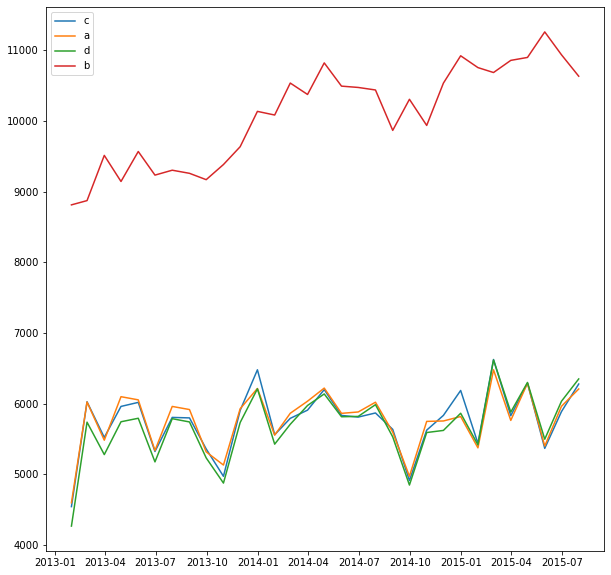

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
for x in combine.StoreType.unique():
    ax.plot(resampled[x]['Sales'], label=x)
    ax.legend()

In [57]:
decomposition = {}
seasonal = {}
trend = {}

In [58]:
import statsmodels.api as sm

decomposition = {}
seasonal = {}
trend = {}

for x in combine.StoreType.unique():
    decomposition[x] = sm.tsa.seasonal_decompose(resampled[x]['Sales'], model='additive')
    seasonal[x] = decomposition[x].seasonal
    trend[x] = decomposition[x].trend
    

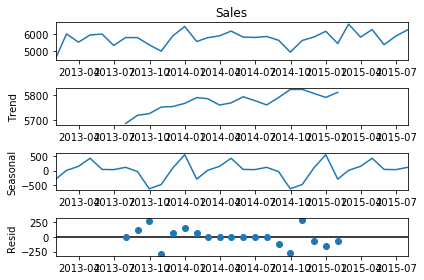

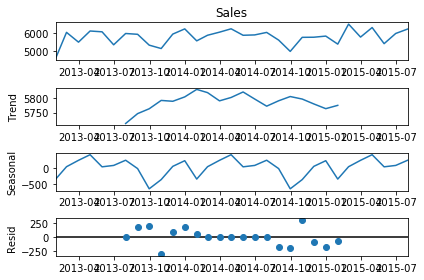

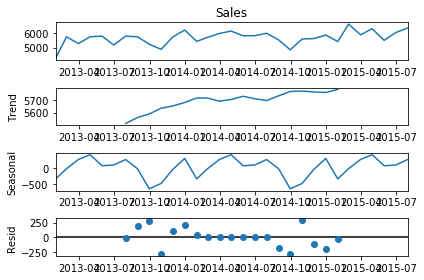

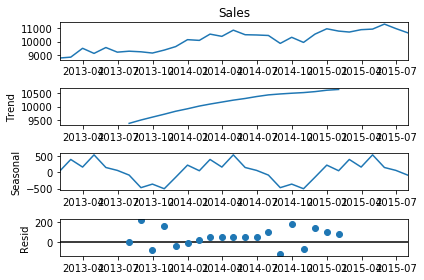

In [59]:
for i, x in enumerate(combine.StoreType.unique()):
    decomposition[x].plot()

In [60]:
combine['Seasonal'] = 0

In [61]:
for x in combine.StoreType.unique():
    combine['Seasonal'] = np.where(combine.StoreType == x, seasonal[x][combine.Date.dt.month], combine.Seasonal)

In [62]:
combine.Seasonal

0         -33.351105
1         -33.351105
2         -33.351105
3         -33.351105
4         -33.351105
             ...    
978179    281.703278
978180    281.703278
978181    281.703278
978182    281.703278
978183    281.703278
Name: Seasonal, Length: 978184, dtype: float64

In [63]:
from scipy.interpolate import make_interp_spline, BSpline

In [64]:
xnew = np.linspace(1, 942, 942)

In [65]:
daynumbers = np.array(seasonal['a'].reset_index().Date.dt.dayofyear) + np.array(seasonal['a'].reset_index().Date.dt.year - 2013)*365 - 15 # we subtract 15 to put the day in the middle of the month

In [66]:
spline = {}
smooth_seasonal = {}
for x in ['a','b','c','d']:
    spline[x] = make_interp_spline(daynumbers, np.array(list(seasonal[x])), k=3)
    smooth_seasonal[x] = spline[x](xnew)

In [67]:
combine['SmoothSeasonal'] = 0
for x in combine.StoreType.unique():
    combine['SmoothSeasonal'] = np.where(combine.StoreType == x, smooth_seasonal[x][combine.Date.dt.dayofyear -1], combine.SmoothSeasonal)

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


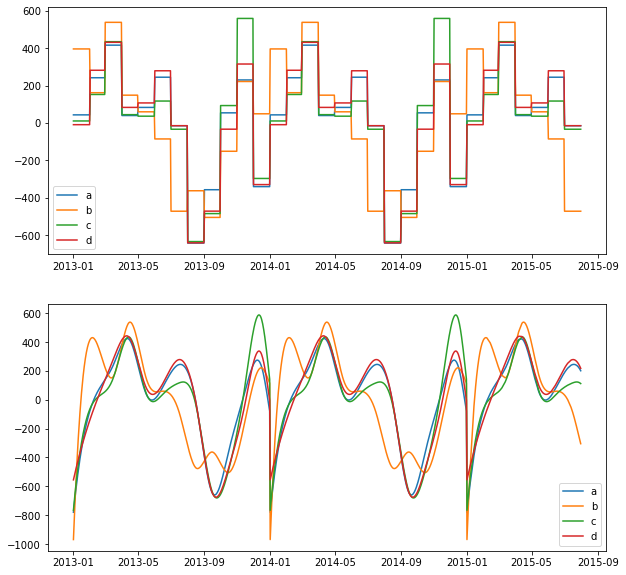

In [68]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

for x in ['a','b','c','d']:
    store_type[x] = combine.loc[combine.StoreType==x].sort_values('Date')
    ax[0].plot(store_type[x].Date, store_type[x].Seasonal, label=x)
    ax[1].plot(store_type[x].Date, store_type[x].SmoothSeasonal, label=x)
    ax[0].legend()
    ax[1].legend()

In [69]:
from statsmodels.formula.api import ols

validTrend = {}
linear_trend = {}
for x in combine.StoreType.unique():
    validTrend[x] = decomposition[x].trend.loc[decomposition[x].trend.isnull()==False].reset_index()
    validTrend[x]['day'] = validTrend[x].Date.dt.dayofyear + (validTrend[x].Date.dt.year - 2013)*365
    linear_trend[x] = ols(formula='trend ~ day', data = validTrend[x]).fit()

In [70]:
combine['DayNumber'] = combine.Date.dt.dayofyear + (combine.Date.dt.year - 2013)*365

In [71]:
combine['Trend'] = 0

for x in combine.StoreType.unique():
    combine['Trend'] = np.where(combine.StoreType == x, combine.DayNumber * linear_trend[x].params['day'] + linear_trend[x].params['Intercept'], combine.Trend)

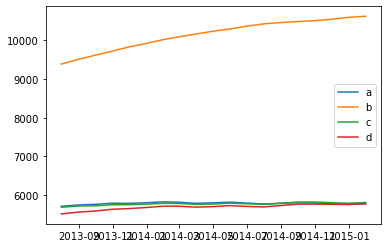

In [72]:
fig, ax = plt.subplots()
for x in ['a','b','c','d']:
    ax.plot(decomposition[x].trend, label=x)
    ax.legend()

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


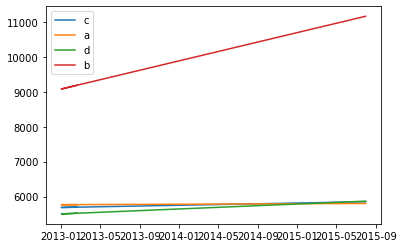

In [73]:
fig, ax = plt.subplots()
stores = {}
for x in combine.StoreType.unique():
    stores[x] = combine.loc[combine.StoreType == x]
    ax.plot(stores[x].Date, stores[x].Trend, label=x)
    ax.legend()

In [74]:
combine['PublicHoliday'] = np.where(combine.StateHoliday == 'a', 1, 0)
combine['EasterHoliday'] = np.where(combine.StateHoliday == 'b', 1, 0)
combine['ChristmasHoliday'] = np.where(combine.StateHoliday == 'c', 1, 0)

In [75]:
for x in combine.StoreType.unique():
    combine[f'Store{x.capitalize()}'] = np.where(combine.StoreType == x, 1, 0)

In [76]:
for x in combine.Assortment.unique():
    combine[f'Assortment{x.capitalize()}'] = np.where(combine.Assortment == x, 1, 0)

In [77]:
unnecessary = ['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',\
               'Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval',\
              'DayNumber','WeekNumber','Month','Year','CompetitionOpenSinceDate','Competition',\
               'StateHoliday', 'Open', 'Customers', 'Date', 'StoreType','StoreA','StoreC','StoreD']

In [78]:
opened = combine.loc[combine.Open==1]

In [79]:
processed = opened.drop(columns=unnecessary)

In [79]:
processed['WeeklySales']

0         26178
1         26178
2         26178
3         26178
4         26178
          ...  
978179    22283
978180    22283
978181    22283
978182    22283
978183    22283
Name: WeeklySales, Length: 811931, dtype: int64

In [73]:
from sklearn.preprocessing import scale

In [74]:
scaled_values = scale(processed)
fully_processed = pd.DataFrame(scaled_values,
                              columns=processed.columns,
                              index=processed.index)

In [93]:
fully_processed.to_csv('fully_processed.csv')

## Identify Key Variables Affecting Sales

In [75]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [76]:
lr = LinearRegression()

In [77]:
efs = {}
best = {}

In [78]:
max_features = 14

In [79]:
for i in range(1, max_features+1):
    efs[i] = EFS(lr,
          min_features=i,
          max_features=i,
          scoring='neg_mean_squared_error',
          print_progress=True,
          cv=0
          )
    
    efs[i].fit(fully_processed.drop(columns=['Sales']), fully_processed['Sales'], custom_feature_names=fully_processed.drop(columns=['Sales']).columns)
    best[i] = efs[i].best_feature_names_


Features: 3000/5005IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 3000/6435IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 3000/6435IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookAp

In [80]:
best

{1: ('Promo',),
 2: ('Promo', 'Trend'),
 3: ('Promo', 'Trend', 'AssortmentC'),
 4: ('Promo', 'Promo2Precise', 'Trend', 'AssortmentC'),
 5: ('DayOfWeek', 'Promo', 'Promo2Precise', 'Trend', 'AssortmentC'),
 6: ('DayOfWeek',
  'Promo',
  'Promo2Precise',
  'Trend',
  'AssortmentA',
  'AssortmentB'),
 7: ('DayOfWeek',
  'Promo',
  'Promo2Precise',
  'SmoothSeasonal',
  'Trend',
  'AssortmentA',
  'AssortmentB'),
 8: ('DayOfWeek',
  'Promo',
  'SchoolHoliday',
  'Promo2Precise',
  'SmoothSeasonal',
  'Trend',
  'AssortmentA',
  'AssortmentC'),
 9: ('DayOfWeek',
  'Promo',
  'SchoolHoliday',
  'Promo2Precise',
  'Seasonal',
  'SmoothSeasonal',
  'Trend',
  'AssortmentA',
  'AssortmentC'),
 10: ('DayOfWeek',
  'Promo',
  'SchoolHoliday',
  'Promo2Precise',
  'Seasonal',
  'SmoothSeasonal',
  'Trend',
  'StoreB',
  'AssortmentA',
  'AssortmentC'),
 11: ('DayOfWeek',
  'Promo',
  'SchoolHoliday',
  'NearbyCompetition',
  'Promo2Precise',
  'Seasonal',
  'SmoothSeasonal',
  'Trend',
  'StoreB',


## Build a Forecasting Model

In [81]:
formula = {}

for j in range(1, max_features+1):
    sum = ''
    for k, predictor in enumerate(best[j]):
        if k == 0:
            sum = f'Q("{predictor}")'
        else:
            sum = f'{sum} + Q("{predictor}")'

    formula[j] = f'Q("Sales") ~ {sum} '

In [82]:
lm = {}
lm_df = {}
coefs = {}
r_squared = {}
r2df = {}

In [211]:
for j in range(1, max_features+1):

    lm[j] = sm.ols(formula[j], fully_processed)\
       .fit()
    coefs[j] = lm[j].params
    r_squared[j] = lm[j].rsquared
lm_df = pd.DataFrame(coefs)

In [84]:
for j in range(1, max_features+1):
    coefs[j] = lm[j].params
lm_df = pd.DataFrame(coefs).transpose()
lm_df['rSquared'] = pd.Series(r_squared, index=list(range(1,max_features+1)), name='rSquared')
lm_df.index.name = "No. of Var.s"

In [91]:
lm_df.T

No. of Var.s,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Intercept,1.218677e-16,1.218677e-16,1.283729e-16,1.283729e-16,1.283729e-16,1.283729e-16,1.283729e-16,1.283729e-16,1.283729e-16,1.283729e-16,1.283729e-16,1.283729e-16,1.283729e-16,1.283729e-16
"Q(""AssortmentA"")",NaN,NaN,NaN,NaN,NaN,-1.272634e-01,-1.273146e-01,5.017852e-01,5.015618e-01,4.919277e-01,4.920954e-01,-1.279120e-01,4.921788e-01,4.921748e-01
"Q(""AssortmentB"")",NaN,NaN,NaN,NaN,NaN,-1.240617e-01,-1.236680e-01,NaN,NaN,NaN,NaN,-1.218745e-01,NaN,NaN
"Q(""AssortmentC"")",NaN,NaN,1.232977e-01,1.271916e-01,1.274434e-01,NaN,NaN,6.283515e-01,6.280999e-01,6.189711e-01,6.192481e-01,NaN,6.193247e-01,6.193198e-01
"Q(""ChristmasHoliday"")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.212211e-04
"Q(""DayOfWeek"")",NaN,NaN,NaN,NaN,-8.627393e-02,-8.625783e-02,-8.856920e-02,-8.635369e-02,-8.657929e-02,-8.656539e-02,-8.655811e-02,-8.654464e-02,-8.654463e-02,-8.654489e-02
"Q(""EasterHoliday"")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.464047e-03,1.467905e-03,1.470001e-03
"Q(""NearbyCompetition"")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.318136e-03,2.326434e-03,2.332209e-03,2.332826e-03
"Q(""Promo"")",3.682148e-01,3.706862e-01,3.708410e-01,3.712905e-01,3.453111e-01,3.451185e-01,3.394950e-01,3.397817e-01,3.399144e-01,3.398468e-01,3.398439e-01,3.398525e-01,3.398475e-01,3.398510e-01
"Q(""Promo2Precise"")",NaN,NaN,NaN,-1.145862e-01,-1.145471e-01,-1.116964e-01,-1.122898e-01,-1.121913e-01,-1.121728e-01,-1.122796e-01,-1.125638e-01,-1.125612e-01,-1.125599e-01,-1.125601e-01


In [90]:
lm_df.to_csv('efs_analysis.csv')

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [141]:
lm_df.T[4].reindex(lm_df.drop(columns=['rSquared']).T[4].abs().sort_values(ascending=False).index)

Q("Promo")                3.712905e-01
Q("Trend")                1.654927e-01
Q("AssortmentC")          1.271916e-01
Q("Promo2Precise")       -1.145862e-01
Intercept                 1.283729e-16
Q("AssortmentA")                   NaN
Q("AssortmentB")                   NaN
Q("ChristmasHoliday")              NaN
Q("DayOfWeek")                     NaN
Q("EasterHoliday")                 NaN
Q("NearbyCompetition")             NaN
Q("PublicHoliday")                 NaN
Q("SchoolHoliday")                 NaN
Q("Seasonal")                      NaN
Q("SmoothSeasonal")                NaN
Q("StoreB")                        NaN
Name: 4, dtype: float64

In [150]:
from statsmodels.tools.eval_measures import rmse

In [202]:
def root_mean_square_percentage_error(y, y_hat):
    "Evaluate forecasting accuracy."
    return np.sqrt( ( ( (y-y_hat)/y)**2).mean() ) * 100

In [203]:
RMSPE = {}

In [204]:
for i in range(1, max_features+1):
    RMSPE[i] = root_mean_square_percentage_error(fully_processed.Sales, lm[i].predict())

In [205]:
RMSPE

{1: 6923.933620551788,
 2: 7011.889416531593,
 3: 7252.933819310521,
 4: 7188.343639023499,
 5: 6970.09598139888,
 6: 6995.49289809725,
 7: 6951.234370068672,
 8: 6983.4663253993685,
 9: 7018.704742092,
 10: 7031.492904325748,
 11: 7037.968311018919,
 12: 7038.2542727152295,
 13: 7037.990379088044,
 14: 7037.982823898365}

In [189]:
RMSE = {}


In [190]:
for i in range(1, max_features+1):
    RMSE[i] = rmse(fully_processed.Sales, lm[i].predict())

In [191]:
RMSE

{1: 0.9297407397815011,
 2: 0.9167974369153468,
 3: 0.90860270112509,
 4: 0.9013719607088139,
 5: 0.8976154383538176,
 6: 0.8948971485111245,
 7: 0.8929759013549793,
 8: 0.8928618637269959,
 9: 0.8928145807051221,
 10: 0.8927917034574228,
 11: 0.8927887809640467,
 12: 0.8927875870768637,
 13: 0.8927873736240426,
 14: 0.8927872747242467}

## Interpret Key Results, Assumptions and Limitations

In [92]:
processed.head()

,DayOfWeek,Sales,Promo,SchoolHoliday,NearbyCompetition,sum,Promo2Precise,Seasonal,SmoothSeasonal,Trend,PublicHoliday,EasterHoliday,ChristmasHoliday,StoreB,AssortmentA,AssortmentC,AssortmentB
0,5,5263,1,1,1,26178,0,-33.351105,112.615398,5852.307993,0,0,0,0,1,0,0
1,4,5020,1,1,1,26178,0,-33.351105,115.613153,5852.133641,0,0,0,0,1,0,0
2,3,4782,1,1,1,26178,0,-33.351105,118.085638,5851.959290,0,0,0,0,1,0,0
3,2,5011,1,1,1,26178,0,-33.351105,120.065412,5851.784938,0,0,0,0,1,0,0
4,1,6102,1,1,1,26178,0,-33.351105,121.585028,5851.610587,0,0,0,0,1,0,0


In [86]:
processed.head()

,Store,Assortment,DayOfWeek,Sales,Promo,SchoolHoliday,NearbyCompetition,WeeklySales,MonthlySales,Promo2Precise,Seasonal,SmoothSeasonal,Trend,PublicHoliday,EasterHoliday,ChristmasHoliday,StoreB,AssortmentA,AssortmentC,AssortmentB
0,1,a,5,5263,1,1,1,26178,104375,0,-33.351105,112.615398,5852.307993,0,0,0,0,1,0,0
1,1,a,4,5020,1,1,1,26178,104375,0,-33.351105,115.613153,5852.133641,0,0,0,0,1,0,0
2,1,a,3,4782,1,1,1,26178,104375,0,-33.351105,118.085638,5851.959290,0,0,0,0,1,0,0
3,1,a,2,5011,1,1,1,26178,104375,0,-33.351105,120.065412,5851.784938,0,0,0,0,1,0,0
4,1,a,1,6102,1,1,1,26178,104375,0,-33.351105,121.585028,5851.610587,0,0,0,0,1,0,0


In [80]:
import statsmodels.formula.api as smf

In [81]:
lm_raw7 = smf.ols("Sales ~ AssortmentA + AssortmentB + DayOfWeek + Promo + Promo2Precise + SmoothSeasonal + Trend",processed).fit()

In [82]:
lm_raw7day = smf.ols("Sales ~ AssortmentA + AssortmentB + DayOfWeek + Promo + Promo2Precise + SmoothSeasonal + Trend",processed).fit()

In [83]:
lm_raw7week = smf.ols("WeeklySales ~ AssortmentA + AssortmentB + DayOfWeek + Promo + Promo2Precise + SmoothSeasonal + Trend",processed).fit()

In [1]:
lm_raw7_m = smf.ols("MonthlySales ~ AssortmentA + AssortmentB + Promo + Promo2Precise + SmoothSeasonal + Trend",processed).fit()

NameError: name 'smf' is not defined

In [87]:
lm_raw7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                 2.947e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        11:30:57   Log-Likelihood:            -7.5933e+06
No. Observations:              811931   AIC:                         1.519e+07
Df Residuals:                  811923   BIC:                         1.519e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         36.8219     43.714      0.842      0.400     -48.855     122.499
AssortmentA     -796.2648      6.260   -127.203      0.000    -808.534    -783.996
AssortmentB    -3934.9142     45.149    -87.154      0.000   -4023.405   -3846.423
DayOfWeek       -160.2457      1.883    -85.098      0.000    -163.936    -156.555
Promo           2127.5357      6.541    325.248      0.000    2114.715    2140.356
Promo2Precise   -708.5295      6.269   -113.024      0.000    -720.816    -696.243
SmoothSeasonal     0.6313      0.011     59.139      0.000       0.610       0.652
Trend              1.2494      0.007    168.506      0.000       1.235       1.264
==============================================================================
Omnibus:                   271146.250   Durbin-Watson:                   0.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1303206.195
Skew:                           1.559   Prob(JB):                         0.00
Kurtosis:                       8.367   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
lm_raw7_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                 2.947e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        11:31:01   Log-Likelihood:            -7.5933e+06
No. Observations:              811931   AIC:                         1.519e+07
Df Residuals:                  811923   BIC:                         1.519e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -759.4429     44.190    -17.186      0.000    -846.054    -672.832
Assortment[T.b] -3138.6494     44.743    -70.148      0.000   -3226.344   -3050.955
Assortment[T.c]   796.2648      6.260    127.203      0.000     783.996     808.534
DayOfWeek        -160.2457      1.883    -85.098      0.000    -163.936    -156.555
Promo            2127.5357      6.541    325.248      0.000    2114.715    2140.356
Promo2Precise    -708.5295      6.269   -113.024      0.000    -720.816    -696.243
SmoothSeasonal      0.6313      0.011     59.139      0.000       0.610       0.652
Trend               1.2494      0.007    168.506      0.000       1.235       1.264
==============================================================================
Omnibus:                   271146.250   Durbin-Watson:                   0.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1303206.195
Skew:                           1.559   Prob(JB):                         0.00
Kurtosis:                       8.367   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
lm_raw7_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MonthlySales   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                 1.811e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        11:45:18   Log-Likelihood:            -1.0096e+07
No. Observations:              811931   AIC:                         2.019e+07
Df Residuals:                  811923   BIC:                         2.019e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.095e+04    953.099    -42.964      0.000   -4.28e+04   -3.91e+04
AssortmentA    -2.091e+04    136.484   -153.197      0.000   -2.12e+04   -2.06e+04
AssortmentB    -1.011e+05    984.399   -102.709      0.000   -1.03e+05   -9.92e+04
DayOfWeek       -152.3390     41.057     -3.710      0.000    -232.809     -71.869
Promo           -307.2008    142.621     -2.154      0.031    -586.734     -27.668
Promo2Precise  -2.118e+04    136.681   -154.944      0.000   -2.14e+04   -2.09e+04
SmoothSeasonal    20.6032      0.233     88.523      0.000      20.147      21.059
Trend             39.7299      0.162    245.766      0.000      39.413      40.047
==============================================================================
Omnibus:                   237796.617   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1057127.908
Skew:                           1.375   Prob(JB):                         0.00
Kurtosis:                       7.866   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

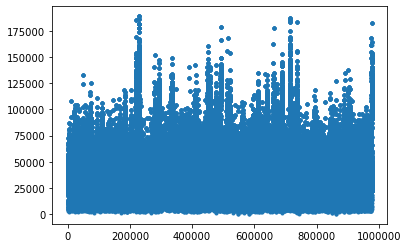

In [179]:
plt.plot(y='WeeklySales',x= 'Week',marker='.', linestyle = 'none', data=processed)